In [1]:
! pip install chess.com

     |████████████████████████████████| 62 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 359 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 17.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 11.0 MB/s eta 0:00:01
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


## Initial analysis

In [9]:
from chessdotcom import get_player_game_archives, get_player_games_by_month, Client
import pandas as pd
import numpy as np

Client.request_config["headers"]["User-Agent"] = (
   "My Python Application. "
   "Contact me at xxxx@gmail.com"
)

In [11]:
from pprint import pprint

response_sample = get_player_games_by_month("mikayil94", year=2023, month=11)

pprint(response_sample.json)

{'games': [{'accuracies': {'black': 54.42, 'white': 66.56},
            'black': {'@id': 'https://api.chess.com/pub/player/serkan09k',
                      'rating': 1134,
                      'result': 'checkmated',
                      'username': 'Serkan09k',
                      'uuid': '0f71c946-91d0-11ed-b733-376942a066b4'},
            'end_time': 1699314508,
            'fen': 'r3qk2/p5Qp/1p4p1/2p2p2/1b6/3P4/PB3PPP/R5K1 b - -',
            'initial_setup': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w '
                             'KQkq - 0 1',
            'pgn': '[Event "Live Chess"]\n'
                   '[Site "Chess.com"]\n'
                   '[Date "2023.11.06"]\n'
                   '[Round "-"]\n'
                   '[White "mikayil94"]\n'
                   '[Black "Serkan09k"]\n'
                   '[Result "1-0"]\n'
                   '[CurrentPosition '
                   '"r3qk2/p5Qp/1p4p1/2p2p2/1b6/3P4/PB3PPP/R5K1 b - -"]\n'
                   '[Timezone "UT

In [12]:
response_sample2 = get_player_game_archives("mikayil94")
pprint (response_sample2.json)

{'archives': ['https://api.chess.com/pub/player/mikayil94/games/2016/06',
              'https://api.chess.com/pub/player/mikayil94/games/2017/07',
              'https://api.chess.com/pub/player/mikayil94/games/2017/08',
              'https://api.chess.com/pub/player/mikayil94/games/2018/01',
              'https://api.chess.com/pub/player/mikayil94/games/2018/02',
              'https://api.chess.com/pub/player/mikayil94/games/2018/03',
              'https://api.chess.com/pub/player/mikayil94/games/2018/04',
              'https://api.chess.com/pub/player/mikayil94/games/2019/09',
              'https://api.chess.com/pub/player/mikayil94/games/2019/10',
              'https://api.chess.com/pub/player/mikayil94/games/2019/11',
              'https://api.chess.com/pub/player/mikayil94/games/2019/12',
              'https://api.chess.com/pub/player/mikayil94/games/2020/01',
              'https://api.chess.com/pub/player/mikayil94/games/2020/02',
              'https://api.chess.com/p

## Getting my Chessdotcom data ready - full process in one cell

In [13]:
# Import necessary libraries
from chessdotcom import get_player_game_archives, get_player_games_by_month, Client
import pandas as pd
import numpy as np
from pprint import pprint

# Configure the user agent for the API requests to Chess.com
# this part is mandatory as per new version of API
Client.request_config["headers"]["User-Agent"] = (
   "My Python Application. "
   "Contact me at xxxx@gmail.com"
)

# Retrieve a list of months during which the player 'mikayil94' has played games
response1 = get_player_game_archives("mikayil94")
list_of_played_months = []
for i in response1.json['archives']:
    list_of_played_months.append(i[-7:])

# Create a DataFrame to store game information
my_games_df = pd.DataFrame(columns = ['time_class', 'date', 'white', 'black', 'game_link', 'opening_code', 'opening_name', 'opening_link', 'result'])

# Loop through each month and retrieve games played in that month
for months in list_of_played_months:
    response2 = get_player_games_by_month("mikayil94", year=months.split("/")[0], month=months.split("/")[1])  
    
    # Extract relevant information from each game and add it to the DataFrame
    for i in response2.json['games']:
        time_class = i['time_class']
        pgn = i['pgn']
        if "ECOUrl" not in pgn : continue  # Skip the game if it doesn't have an ECO URL

        # Extract various details from the PGN (Portable Game Notation) of the chess game
        date = pgn[pgn.find("Date"):].split(" ")[1].split("]")[0].strip('\"')
        white = pgn[pgn.find("White"):].split(" ")[1].split("]")[0].strip('\"')
        black = pgn[pgn.find("Black"):].split(" ")[1].split("]")[0].strip('\"')
        game_link = pgn[pgn.find("Link"):].split(" ")[1].split("]")[0].strip('\"')
        opening_code = pgn[pgn.find("ECO"):].split(" ")[1].split("]")[0].strip('\"')
        opening_name = pgn[pgn.find("ECOUrl"):].split(" ")[1].split("]")[0].split("/")[-1].strip('\"')    
        opening_link = pgn[pgn.find("ECOUrl"):].split(" ")[1].split("]")[0].strip('\"')    
        result = np.where(pgn[pgn.find("Termination"):].split(" ")[1].split("]")[0].strip('\"') == 'mikayil94', 'Win', 'Loss') # if my username is in this field, it means I was the Winner.

        # Create a new DataFrame for the current game and append it to the main DataFrame
        my_games_df_new = pd.DataFrame({'time_class' : [time_class], 'date' : [date], 'white' : [white], 'black' : [black], \
                        'game_link' : game_link, 'opening_code' : opening_code, 'opening_name' : [opening_name], 'opening_link' : [opening_link], 'result' : [result]})
        my_games_df = pd.concat([my_games_df, my_games_df_new], ignore_index=True)

my_games_df.shape      

(1031, 9)

In [14]:
# Add a new column 'opening_side' to the DataFrame. If the player 'mikayil94' is white, set the value to 'white', otherwise 'black'
my_games_df['opening_side'] = np.where(my_games_df.white == 'mikayil94', 'white', 'black')

# Add a new column 'result_binary'. If the result of the game is 'Win', set the value to 1, otherwise 0
my_games_df['result_binary'] = np.where(my_games_df.result == 'Win', 1, 0)

# Group the DataFrame by opening name, link, code, and the side 'mikayil94' played.
# Aggregate the data to count the total number of wins and total games played for each group
my_openings = my_games_df.groupby(["opening_name", "opening_link", "opening_code", "opening_side"], as_index=False).agg(
    games_win = ('result_binary', 'sum'),  # Sum of 'result_binary' to get total wins
    games_count = ('result_binary', 'count')  # Count of 'result_binary' to get total games played
)

# Calculate the win percentage for each opening and add it as a new column 'win_percentage'
# The win percentage is rounded to two decimal places
my_openings['win_percentage'] = round(my_openings.games_win / my_openings.games_count, 2)

In [15]:
# checking data in table
my_openings[my_openings.games_count > 10].sort_values("win_percentage", ascending=False)

,opening_name,opening_link,opening_code,opening_side,games_win,games_count,win_percentage
255,Owens-Defense,https://www.chess.com/openings/Owens-Defense,B00,black,10,15,0.67
16,Barnes-Opening-1...d5-2.e4,https://www.chess.com/openings/Barnes-Opening-...,A00,white,9,14,0.64
130,Italian-Game-Anti-Fried-Liver-Defense,https://www.chess.com/openings/Italian-Game-An...,C55,white,7,12,0.58
196,Kings-Pawn-Opening-Leonardis-Variation,https://www.chess.com/openings/Kings-Pawn-Open...,C20,white,31,54,0.57
365,Scandinavian-Defense,https://www.chess.com/openings/Scandinavian-De...,B01,white,7,15,0.47
274,Philidor-Defense-3.Bc4,https://www.chess.com/openings/Philidor-Defens...,C41,white,5,11,0.45
205,Kings-Pawn-Opening-Napoleon-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,C20,white,18,47,0.38
317,Queens-Pawn-Opening-Accelerated-London-System,https://www.chess.com/openings/Queens-Pawn-Ope...,D00,black,4,11,0.36
210,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,C20,black,3,11,0.27
444,Vant-Kruijs-Opening-1...e5,https://www.chess.com/openings/Vant-Kruijs-Ope...,A00,white,3,13,0.23


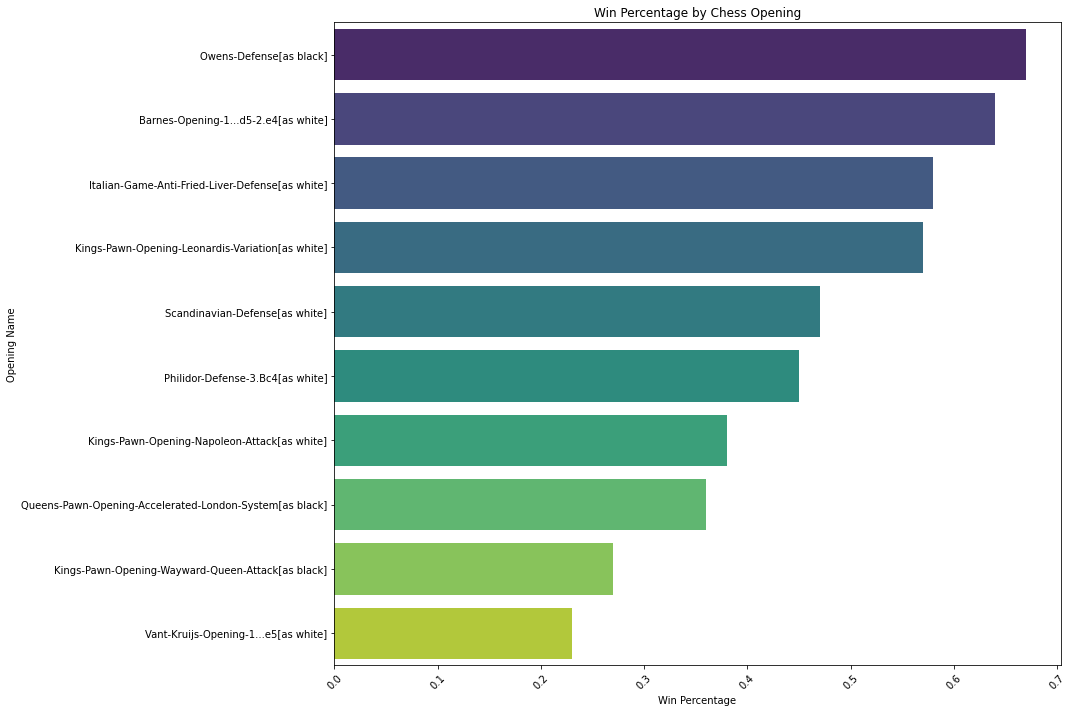

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization
# Add new column, to concatenate opening name and opening side, which will be used in visualization
my_openings['opening_and_side'] = my_openings.opening_name + '[as ' + my_openings.opening_side + ']'
# filter data to show only games with at least 10 count
viz_data = my_openings[my_openings.games_count > 10].sort_values("win_percentage", ascending=False)[['opening_and_side', 'win_percentage']]

# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='win_percentage', y='opening_and_side', data=viz_data, palette="viridis", ci=None)
plt.title('Win Percentage by Chess Opening')
plt.xlabel('Win Percentage')
plt.ylabel('Opening Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

New takeaways:
- good - Owens-Defense - black + 
- good - Barnes-Opening-1...d5-2.e4 - white + 
- bad - Kings-Pawn-Opening-Napoleon-Attack - white +
- bad - Queens-Pawn-Opening-Accelerated-London-System - black
- bad - Kings-Pawn-Opening-Wayward-Queen-Attack - black
- bad - Vant-Kruijs-Opening-1...e5 - this is already written - white + 

## Further ad-hoc analysis

In [8]:
my_games_df[(my_games_df.opening_side == 'black') & (my_games_df.opening_name == 'Kings-Pawn-Opening-Wayward-Queen-Attack')]

,time_class,date,white,black,game_link,opening_code,opening_name,opening_link,result,opening_side,result_binary
153,blitz,2018.02.09,Llamantol,mikayil94,https://www.chess.com/game/live/2604786835,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
378,blitz,2019.10.15,magnvs,mikayil94,https://www.chess.com/game/live/4121894671,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
399,blitz,2019.10.30,martijngrazer,mikayil94,https://www.chess.com/game/live/4164052643,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
400,blitz,2019.10.30,fermyon,mikayil94,https://www.chess.com/game/live/4164396265,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
416,blitz,2019.11.12,Ibecheckinyoumate,mikayil94,https://www.chess.com/game/live/4203101459,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
419,blitz,2019.11.13,aniketbhonge1,mikayil94,https://www.chess.com/game/live/4206390265,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
495,blitz,2019.12.05,minaskonstantinidis,mikayil94,https://www.chess.com/game/live/4272937197,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Win,black,1
501,blitz,2019.12.06,29black32red,mikayil94,https://www.chess.com/game/live/4275481830,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
503,blitz,2019.12.06,elvkaraca,mikayil94,https://www.chess.com/game/live/4275507283,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Loss,black,0
554,blitz,2019.12.13,PIJ72,mikayil94,https://www.chess.com/game/live/4295949180,C20,Kings-Pawn-Opening-Wayward-Queen-Attack,https://www.chess.com/openings/Kings-Pawn-Open...,Win,black,1
